In [1]:
"""Errors might remain if Kernel is not restarted"""
"""Changes to local modules might not update if Kernel is not restarted"""

'Changes to local modules might not update if Kernel is not restarted'

In [3]:
import numpy as np

""" Loading data: e.g. here, data is cleaned and coordinates are computed in module load_text_data"""
from load_text_data import Coords_Rows, Coords_Cols, ContDataFrame, columns_labels, rows_labels, D, Dr, Dc, row_val, col_val, dtp, ColName, RowName

""" Compute similarity and association metrics: e.g. here using modules bellow """
from Methods.Core.Generate_Distances import Similarity_Metric, Association_Metric

D_row_var = Similarity_Metric(Coords_Rows, method = "Euclidean")
D_col_var = Similarity_Metric(Coords_Cols, method = "Euclidean")

func = lambda Coords: np.exp(-Dr.dot(D.dot(Dc))) ### Pearson ratio - 1  #### here independent of the coordinates
D_assoc = Association_Metric(Coords_Rows, Coords_Cols, func)

"""Distane to origin Optional"""
Orow = np.linalg.norm(Coords_Rows, axis = 1)
Ocols = np.linalg.norm(Coords_Cols, axis = 1)
"""If Distance to origina set to None, then distance to Origin is not interpretable"""
#Orow = None
#Ocols = None

'If Distance to origina set to None, then distance to Origin is not interpretable'

In [4]:
"""joint Euclidean embedding of row and column variables"""
from Methods.Core.qEmbedding import Euclidean_Embedding
M = D_row_var.shape[0]
N = D_col_var.shape[0]

### Parameters needed for Euclidean Embedding (See Paper) ####
c1, c2 = 1/4, 1/2 # Parameters for text graphs in MATH+ day cluster 2022
c3 = (2*c1 + M*c2 - 1)/M # choose this because this is the only one that works for Form = "SP", "PI"
c = {"c1":c1, "c2":c2, "c3":c3} 
Coords, vareps = Euclidean_Embedding(D_row_var, D_col_var, Orow, Ocols, D_assoc, c) ### Orow, Ocols are optional, if not given, then distance to Origin is not interpretable

Replacement matrix is PSD


In [5]:
"""Coordinate system for regular projection on principal axes"""
if (Orow is not None)&(Ocols is not None):
    Emb_Rows = Coords[:M, :]
    Emb_Cols = Coords[M+1:, :]
    Origin = Coords[M, :] 
else:
    Emb_Rows = Coords[:M, :]
    Emb_Cols = Coords[M:, :]
    Origin = np.zeros(Emb_Rows.shape[1])

In [11]:
"""Clustering of Similarity and Association patterns"""
from Methods.Core.Lower_dim import get_clusters
palette = "tab20" ## seaborn color palette
num_clust = N
Centred_Coords = Coords - Origin[np.newaxis, :]
#Centred_Cols = Emb_Cols - Origin[np.newaxis, :]
clust_labels, color_clustered = get_clusters(Coords, num_clust, palette, method = "Kmeans")#, init = Centred_Cols)

"""Lower Dimensional visualization of clusters"""
from Methods.Core.Lower_dim import low_dim_coords
nb = 15 ### only for UMAP method for Egyptian texts data 
low_meth = "umap" # or sklearn.manifols methods: MDS, Isomap, 
Coords_manifold = low_dim_coords(Centred_Coords, dim=2, method  = low_meth, n_neighbors = nb) 

"""
Kmeans and UMAP are already parameterized for reproducibility (random_state = 0 for both)
However, 
"""

'Kmeans and UMAP are already parameterized for reproducibility (random_state = 0)'

In [7]:
"""Coordinate system for regular projection on principal axes"""
if (Orow is not None)&(Ocols is not None):
    Rows_manifold = Coords_manifold[:M, :]
    Cols_manifold = Coords_manifold[M+1:, :]
    Origin_manifold = Coords_manifold[M, :] 
else:
    Emb_Rows_manifold = Coords_manifold[:M, :]
    Emb_Cols_manifold = Coords_manifold[M:, :]
    Origin_manifold = np.zeros(Emb_Rows.shape[1])

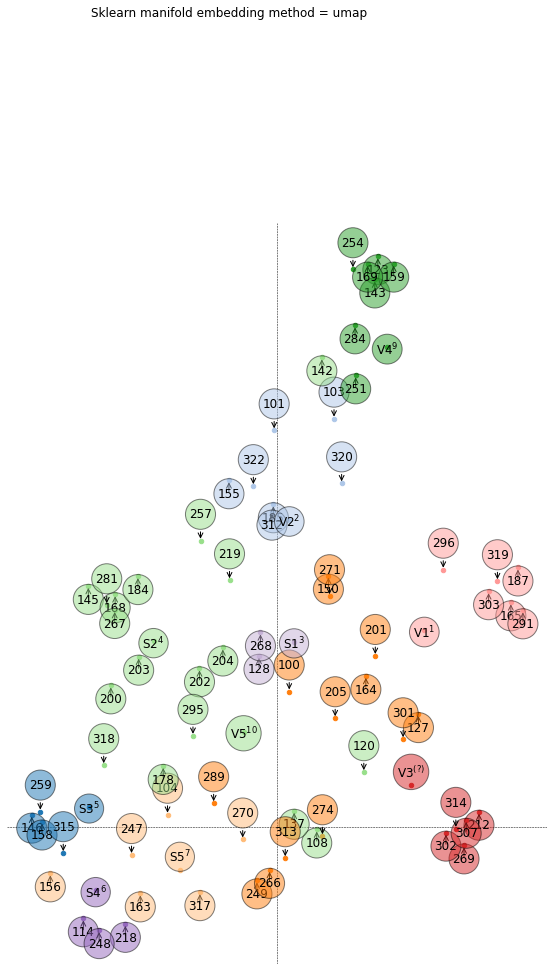

In [8]:
"""Plot and Save figure"""
from Methods.figure_settings import Display
Inertia = np.array([0, 1]) # not relevant for manifold
AllCols = ContDataFrame.columns
AllRows = ContDataFrame.index
col_rows = {rows_labels[ContDataFrame.index[i]]:color_clustered[i] for i in range(M)}
col_cols = {columns_labels[ContDataFrame.columns[i]]:color_clustered[i+M+1] for i in range(N)}
col_to_use = (col_rows, col_cols)
marker_to_use = [("o",20),("o",20)]
fig, xy_rows, xy_cols, gs, center = Display(Rows_manifold, 
                                             Cols_manifold, 
                                             Inertia, 
                                             ContDataFrame,
                                             center = Origin_manifold, 
                                             rows_to_Annot = AllRows,  # row items to annotate, if None then no annotation (None if none)
                                             cols_to_Annot = AllCols,  # column items to annotate (None if none)
                                             Label_rows = rows_labels, # dictionary of labels respectivelly corresponding to the row items (None if none)
                                             Label_cols = columns_labels,     # dictionary of labels respectivelly corresponding to the column items that (None if none)
                                             markers = marker_to_use,# pyplot markertypes, markersize: [(marker for the row items, size), (marker for the columb items, size)] 
                                             col = col_to_use,        # pyplot colortypes : [color for the row items, color for the column items] 
                                             figtitle = "Sklearn manifold embedding method = %s"%low_meth, 
                                             outliers = (True, True),
                                             dtp = dtp,
                                             chosenAxes = np.array([0,1]), 
                                             show_inertia = False, 
                                             model={"model":"stand"}, 
                                             ColName = ColName, 
                                             RowName = RowName,
                                             lims = False) # crop fig

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pdf= PdfPages("Figures/fig%s_%s"%(col_val,row_val)+".pdf")
pdf.savefig(fig, bbox_inches = "tight")
pdf.close()
plt.show()